### 피마 당뇨병 데이터

In [215]:
library(tidyverse)
library(data.table)
library(gridExtra)
library(ggplot2)
library(RColorBrewer)
library(gridExtra)
library(reshape2)

In [73]:
data<-fread("diabetes.csv")

# 기술통계량 Outline 및 간단한 전처리

데이터에 있는 모든 개체들은 여자들임

In [74]:
head(data)

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome
1 0.627                    50  1      
2 0.351                    31  0      
3 0.672                    32  1      
4 0.167                    21  0      
5 2.288                    33  1      
6 0.201                    30  0

In [75]:
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

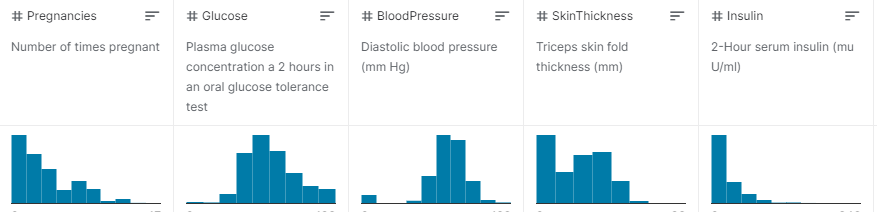

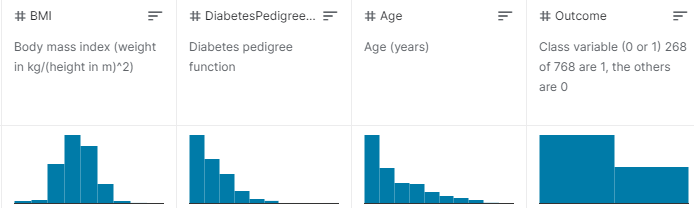

In [ ]:
# 나이 그룹별로 통게량 확인을 위해 나이 열 추가
data[,AgeGroup := Age %/% 10]

In [77]:
#고령자들 데이터 3개 제거.
data <- data[AgeGroup<7]

In [121]:
scatter_d <- function(df, col1, col2, ...) {
    graph <- ggplot(df, aes(x = get(col1), y = get(col2))) + 
    geom_point(shape = 20, size = 5, aes(colour = factor(get(...)))) + 
    ggtitle(paste("Scatter Plot :",col1,"between",col2)) + 
    labs(colour = paste(...), x = col1, y = col2)
    
    graph + scale_fill_brewer(palette = "Set1")
    return(graph)
}

In [115]:
Boxplot <- function(df, col1) {
    graph <- ggplot(df, aes(x = 1, y = get(col1))) +
    geom_boxplot() +
    ggtitle(paste("Boxplot of",col1)) + 
    labs(x = "value", y = col1)
    
    return(graph)
}

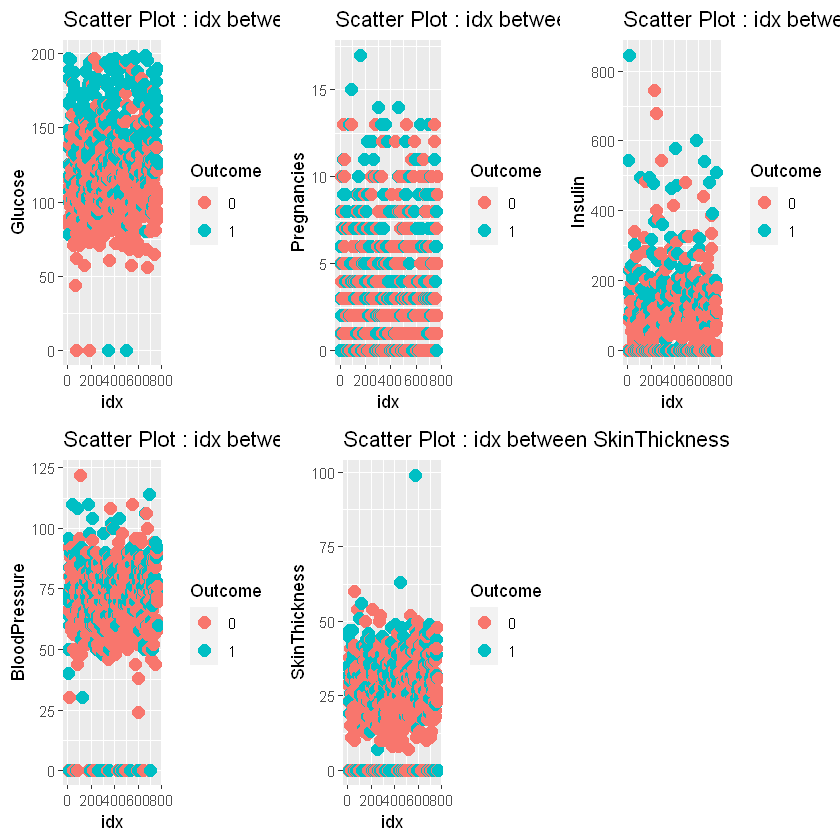

In [111]:
sca_graph_list <- list()
cols <- c("Glucose", "Pregnancies", "Insulin", "BloodPressure",
         "SkinThickness")

for (i in 1:length(cols)){
  sca_graph_list[[i]] = scatter_d(data, "idx", cols[i], "Outcome")
}

do.call("grid.arrange", c(sca_graph_list, ncol = 3, nrow = 2))

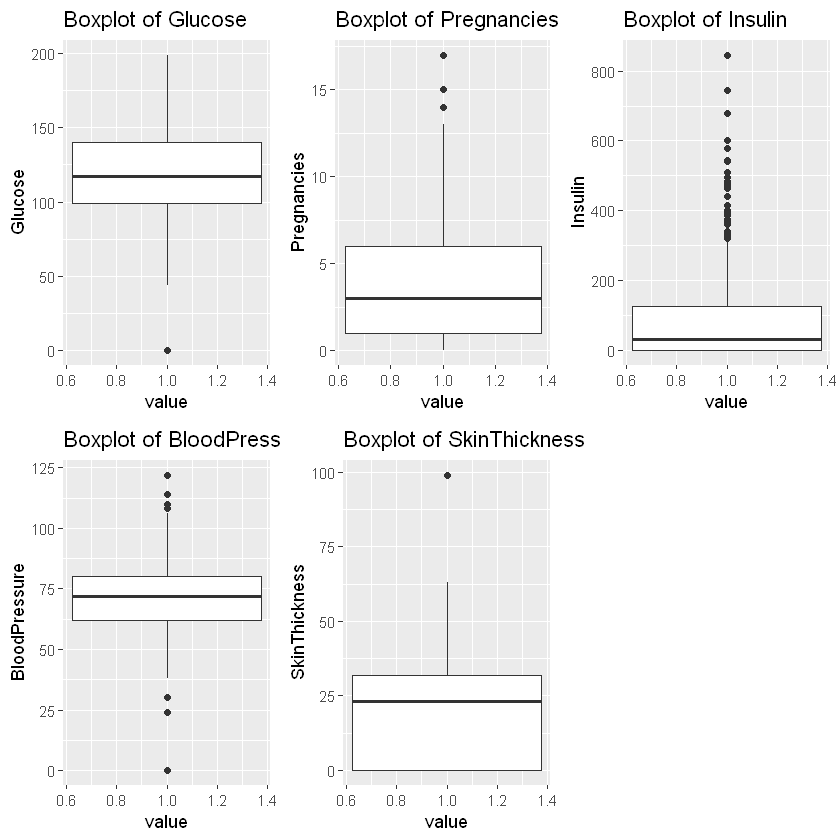

In [118]:
box_graph_list <- list()
cols <- c("Glucose", "Pregnancies", "Insulin", "BloodPressure",
         "SkinThickness")

for (i in 1:length(cols)){
  box_graph_list[[i]] = Boxplot(data, cols[i])
}

do.call("grid.arrange", c(box_graph_list, ncol = 3, nrow = 2))

# 혈압 및 BMI 변수 처리

혈압의 연령별 평균이 다르고,   
2~40대의 경우 혈압의 결측값이 많기 때문에,    
혈압 결측값 연령별 혈압 중위수로 대체    
why 중위수? 평균과 그렇게 차이 안나고 깔끔한 값  

In [78]:
data[BloodPressure!=0,mean(BloodPressure),AgeGroup][order(AgeGroup)]
data[BloodPressure!=0,median(BloodPressure),AgeGroup][order(AgeGroup)]

AgeGroup V1      
1 2        68.82447
2 3        73.68590
3 4        77.21239
4 5        79.80702
5 6        78.27586

AgeGroup V1
1 2        68
2 3        74
3 4        78
4 5        78
5 6        78

In [81]:
data[BloodPressure == 0 & AgeGroup == 2, BloodPressure := 68]
data[BloodPressure == 0 & AgeGroup == 3, BloodPressure := 74]
data[BloodPressure == 0 & AgeGroup == 4, BloodPressure := 78]

BMI 0으로 나온 값들 다 연령별 평균으로 대체    
정규분포모양으로 생겨서 평균으로 대체하였음

In [39]:
data[BMI != 0, mean(BMI), AgeGroup][order(AgeGroup)]
data[BMI != 0, median(BMI), AgeGroup][order(AgeGroup)]

AgeGroup V1      
1 2        32.03763
2 3        32.67012
3 4        34.61780
4 5        31.89821
5 6        29.73571

AgeGroup V1   
1 2        31.60
2 3        32.00
3 4        33.95
4 5        33.05
5 6        29.30

In [84]:
data[BMI==0 & AgeGroup == 2, BMI:=32.04]
data[BMI==0 & AgeGroup == 3, BMI:=32.67]
data[BMI==0 & AgeGroup == 5, BMI:=31.90]
data[BMI==0 & AgeGroup == 6, BMI:=29.74]

In [86]:
# BMI 그룹별로 나누는 변수 추가
data[,BMI_cat := ifelse(BMI < 18.5,"uw",ifelse(BMI<25,"nm",ifelse(BMI<30,"ow","ob")))]
# row index 추가
data[, idx := seq(1,764)]

# Glucose 결측값 처리

In [120]:
data[Glucose == 0]

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI
     DiabetesPedigreeFunction Age Outcome AgeGroup BMI_cat idx

In [119]:
data[Glucose == 0 & BloodPressure == 48, Glucose:=98]
data[Glucose == 0 & BloodPressure == 74, Glucose:=89]
data[Glucose == 0 & BMI == 32.0, Glucose:=109]
data[Glucose == 0 & BMI == 39, Glucose:=158]
data[Glucose == 0 & BloodPressure == 80, Glucose:=140]

글루코오스 같은 경우, 결측치가 5개 행밖에 없기 때문에  
가장 결측 행과 비슷한 행의 값들을 찾아 단일일 땐 그 값을 적고  
그 외에는 평균을 하고, 반올림 처리 하여 결측을 채웠다.   

추가적으로 알아낸 사실은 인슐린과 글루코오스간 관계가 있어보여서 히스토그램을 그려볼 것이다.  
만일 관계가 있다면 Insulin의 많은 결측값도 채워볼 수 있지 않을까 싶다.  

# Insulin 변수 처리 .. 난관..

일단 변수에 0이 너무 많아서 분명 결측치도 있을 것이라고 생각하지만   
일단 스킵한다.  

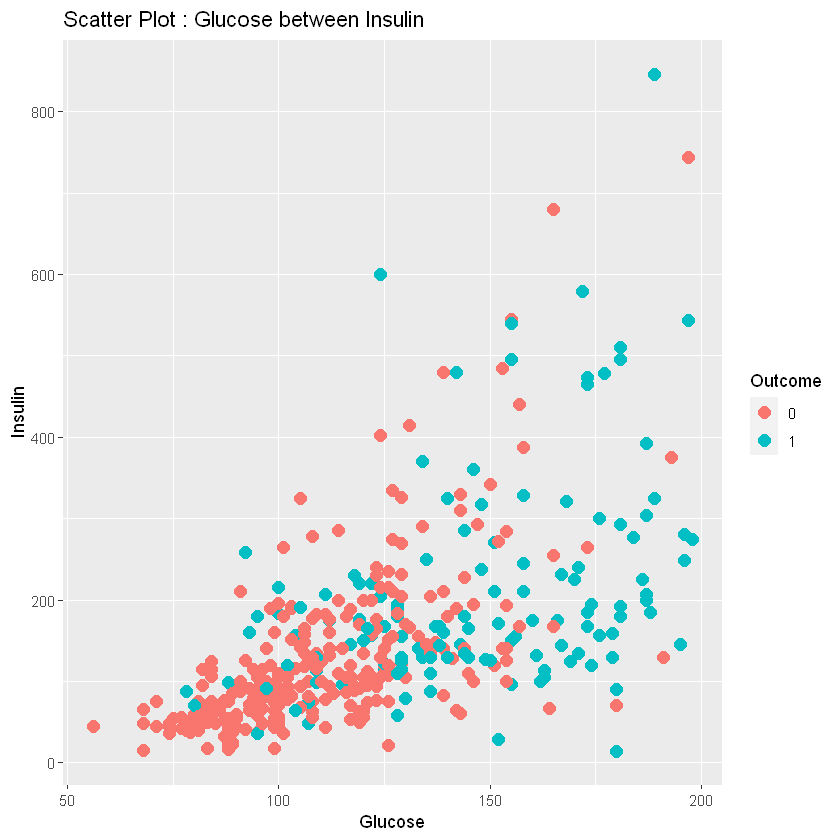

In [125]:
scatter_d(data[Insulin != 0], "Glucose", "Insulin", "Outcome")

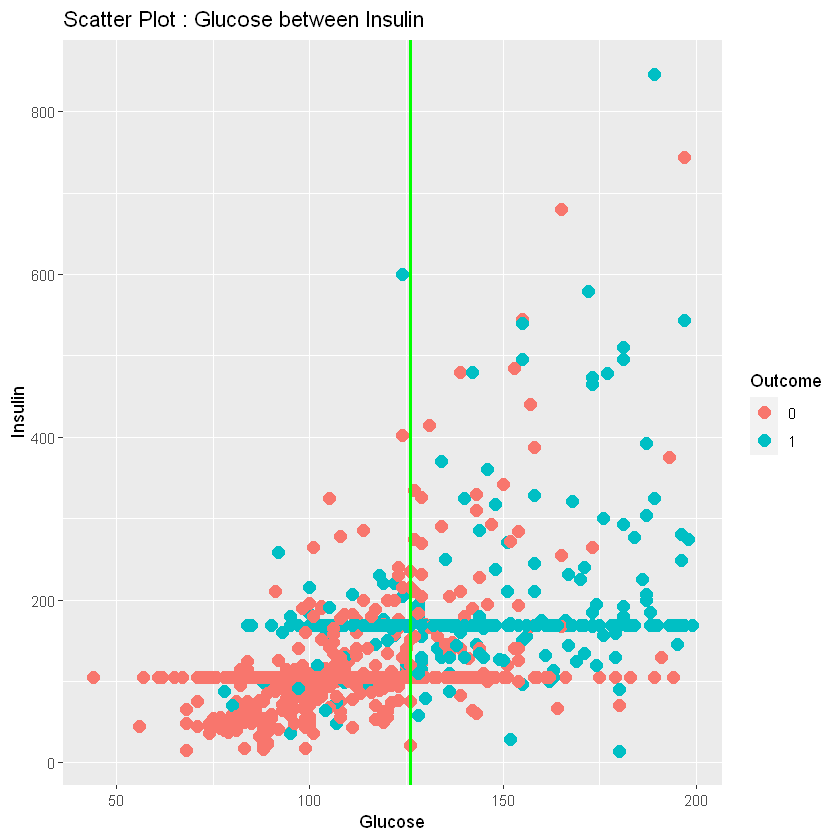

In [195]:
scatter_d(data, "Glucose", "Insulin", "Outcome") + geom_vline(xintercept = 126, col = "green", size = 1)

In [194]:
scatter_d(data[Insulin != 0], "BMI", "Insulin", "Outcome") + geom_vline(xintercept = 30, col = "green", size = 1)

모르겠고,, insulin은 당뇨 아닌사람과 당뇨인 사람의 값의 메디안을 채우겠다.

In [179]:
data[Insulin != 0, median(Insulin), by = Outcome]

Outcome V1   
1 0       105.0
2 1       169.5

In [182]:
data[Insulin == 0 & Outcome == 0, Insulin:= 105.0]
data[Insulin == 0 & Outcome == 1, Insulin:= 169.0]

인슐린의 정상 수치 범위는 공복 시 5\~15이며, 인슐린 저항성이   
있는 경우 15\~40

# SkinThickness 변수 처리

이런 경우는 BMI수치에 따라 SkinThickness가 관계를 가지므로,   
회귀분석을 실행하여 SkinThickness값을 채워주도록 하겠음..!!  

In [165]:
rline <- lm(data[SkinThickness!=0,SkinThickness]~data[SkinThickness!=0,BMI])

In [166]:
rline


Call:
lm(formula = data[SkinThickness != 0, SkinThickness] ~ data[SkinThickness != 
    0, BMI])

Coefficients:
                  (Intercept)  data[SkinThickness != 0, BMI]  
                      -3.4650                         0.9878  


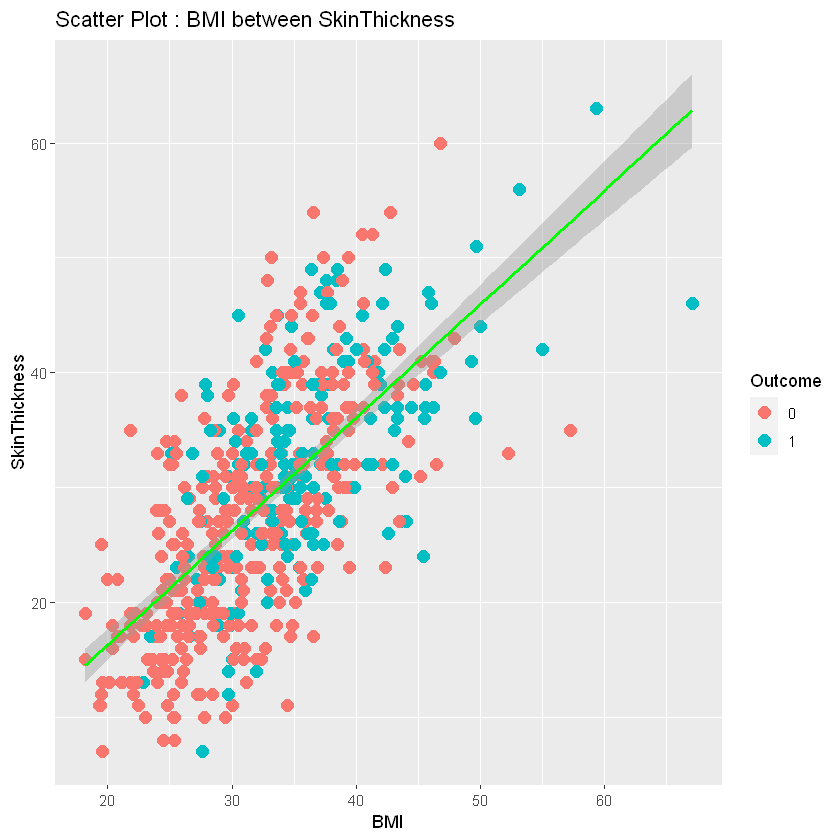

In [167]:
scatter_d(data[SkinThickness!=0], "BMI", "SkinThickness", "Outcome") +
    geom_smooth(method = 'lm', formula = y~x, color = "green")

In [162]:
# 아웃라이어 제거
data <- data[idx != 578]

In [171]:
# StickThickness 값 채우기
data[SkinThickness == 0 , SkinThickness := round(-3.4650 + 0.9878*BMI)]

In [184]:
head(data)

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35            169     33.6
2 1            85     66            29            105     26.6
3 8           183     64            19            169     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74            21            105     25.6
  DiabetesPedigreeFunction Age Outcome AgeGroup BMI_cat idx
1 0.627                    50  1       5        ob      1  
2 0.351                    31  0       3        ow      2  
3 0.672                    32  1       3        nm      3  
4 0.167                    21  0       2        ow      4  
5 2.288                    33  1       3        ob      5  
6 0.201                    30  0       3        ow      6

In [226]:
#상관계수 heatmap 그리기..!!
temp <- data[, c(1,2,3,4,5,6,7,8)]
cormat <- round(cor(temp),2)
cormat

Pregnancies Glucose BloodPressure SkinThickness
Pregnancies               1.00       0.13    0.21          0.08         
Glucose                   0.13       1.00    0.23          0.20         
BloodPressure             0.21       0.23    1.00          0.23         
SkinThickness             0.08       0.20    0.23          1.00         
Insulin                   0.06       0.49    0.07          0.20         
BMI                       0.02       0.24    0.29          0.74         
DiabetesPedigreeFunction -0.03       0.14    0.00          0.13         
Age                       0.56       0.27    0.34          0.08         
                         Insulin BMI  DiabetesPedigreeFunction Age 
Pregnancies              0.06    0.02 -0.03                    0.56
Glucose                  0.49    0.24  0.14                    0.27
BloodPressure            0.07    0.29  0.00                    0.34
SkinThickness            0.20    0.74  0.13                    0.08
Insulin                  1.00    0.23  0.15                    0.13
BMI                      0.23    1.00  0.16                    0.04
DiabetesPedigreeFunction 0.15    0.16  1.00                    0.03
Age                      0.13    0.04  0.03                    1.00

In [227]:
get_lower_tri <- function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
}
get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)] <- NA
    return(cormat)
}
reorder_cormat <- function(cormat){
    # Use correlation between variables as distance
    dd <- as.dist((1-cormat)/2)
    hc <- hclust(dd)
    cormat <-cormat[hc$order, hc$order]
}
upper_tri <- get_upper_tri(cormat)
melted_cormat <- melt(upper_tri,na.rm = TRUE)

In [228]:
heatmap <- function(melted_data){
    graph <- ggplot(data = melted_data, aes(Var2, Var1, fill = value)) +
    geom_tile(color = "white") + 
    scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                        midpoint = 0, limit = c(-1,1), space = "Lab",
                        name = "Pearson\nCorrelation") + 
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1)) +
    coord_fixed()
    return(graph)
} 

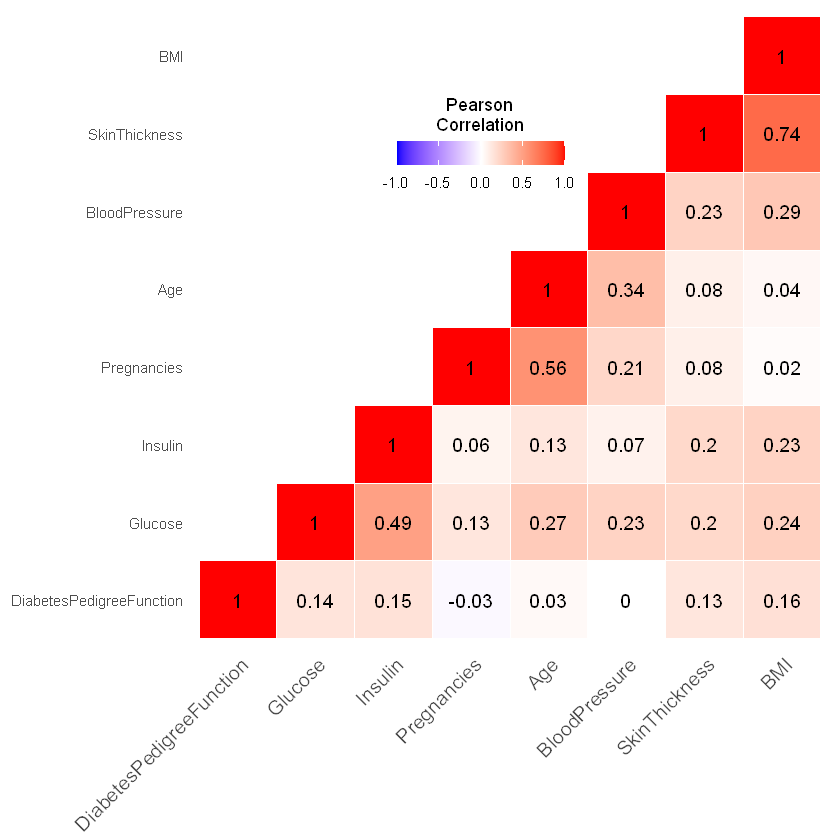

In [229]:
cormat <- reorder_cormat(cormat)
upper_tri <- get_upper_tri(cormat)
melted_cormat <- melt(upper_tri, na.rm = TRUE)
heatmap(melted_cormat) + 
geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))

+ 이전에 EDA로 살펴보았던 그래프들이 역시 상관계수가 높게 나왔음.   
+ Pregnancy와 Age는 한번 봐볼 필요가 있음.

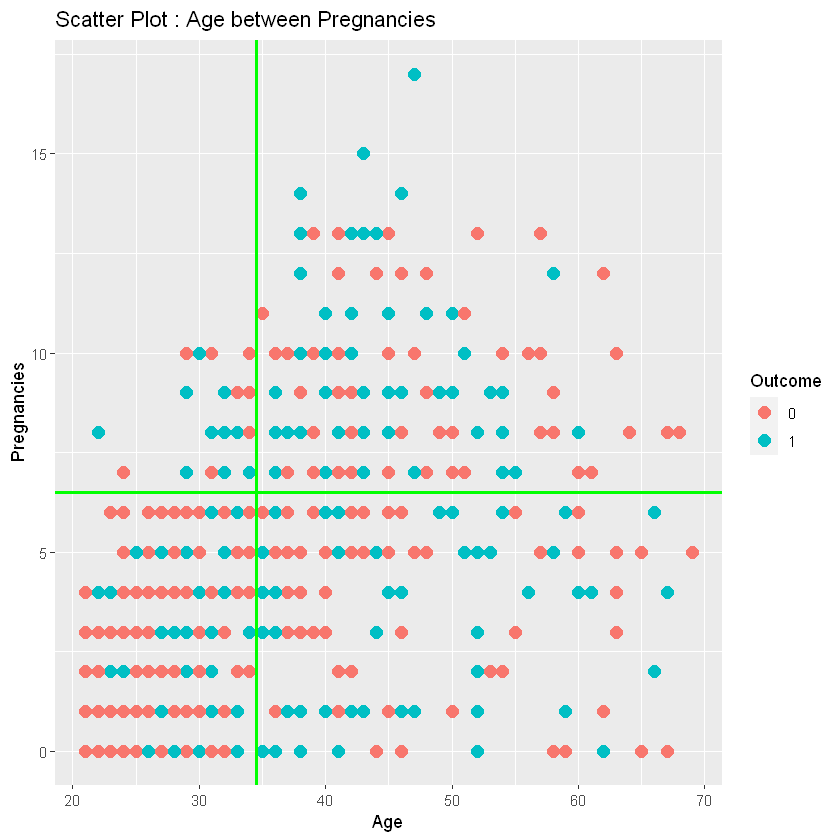

In [236]:
scatter_d(data, "Age","Pregnancies","Outcome") + 
    geom_vline(xintercept = 34.5, col = "green", size = 1) + 
    geom_hline(yintercept = 6.5, col = "green", size = 1)

좌측 하단을 보면 대부분의 데이터가 몰려있는 것을 확인할 수 있고,     
당뇨가 아닌 사람들이 집중적으로 포진되어 있음   
따라서 이 부분을 새로운 변수로 만들어볼만 함 !!

# 추가로 더해줄만한 변수

In [190]:
# 연령별 당뇨병 비율
data[Outcome == 1,.N,by = AgeGroup][order(AgeGroup)][,2] / data[,.N,AgeGroup][order(AgeGroup)][,2]
data[AgeGroup != 8][,.N,AgeGroup][order(AgeGroup)]

N        
1 0.2121212
2 0.4606061
3 0.5508475
4 0.5964912
5 0.2500000

AgeGroup N  
1 2        396
2 3        165
3 4        118
4 5         57
5 6         28

In [200]:
#위험군인 30~50대에 1을 부여
data[,D1 := ifelse(AgeGroup %in% c(2,6),0,1)]

20대와 60대의 당뇨 비율 낮고 30대와 50대 사이  
당뇨 비율이 높음 따라서 20,60 과 30\~50으로 0,1 더미 변수 만듬

In [193]:
# BMI별 당뇨병 비율
data[Outcome == 1, .N, by = BMI_cat][order(BMI_cat)][,2] / data[BMI_cat!="uw",.N,by = BMI_cat][order(BMI_cat)][,2]
data[, .N, by = BMI_cat][order(BMI_cat)]

N         
1 0.06930693
2 0.45625000
3 0.22346369

BMI_cat N  
1 nm      101
2 ob      480
3 ow      179
4 uw        4

In [204]:
#위험군인 과체중쪽에 1을 부여
data[,D2 := ifelse(BMI_cat %in% c("uw","nm"),0,1)]

전반적으로 무게가 많이 나가는 사람이 많이 조사되었고,   
피마 인디언은 무게가 많이 나가는 사람이 많은가 보다.  
비만 --> 과체중 --> 저체중 --> 정상 순으로   
당뇨병 비율이 높았음.

(OverWeight, Obese) , (normal, underweight)로 더미변수 만들자

In [230]:
# 혈당 수치 126 이상인 부분을 1로 코딩한 더미변수 부여
data[,D3 := ifelse(Glucose < 126,0,1)]

In [237]:
# 임신여부와 나이를 고려한 추가변수.
data[,D4 := ifelse(Age < 35,ifelse(Pregnancies < 7,0,1),1)]

In [239]:
head(data)

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35            169     33.6
2 1            85     66            29            105     26.6
3 8           183     64            19            169     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74            21            105     25.6
  DiabetesPedigreeFunction Age Outcome AgeGroup BMI_cat idx D1 D2 D3 D4
1 0.627                    50  1       5        ob      1   1  1  1  1 
2 0.351                    31  0       3        ow      2   1  1  0  0 
3 0.672                    32  1       3        nm      3   1  0  1  1 
4 0.167                    21  0       2        ow      4   0  1  0  0 
5 2.288                    33  1       3        ob      5   1  1  1  0 
6 0.201                    30  0       3        ow      6   1  1  0  0

In [240]:
setcolorder(data, c(12,1,2,3,4,5,6,7,8,13,14,15,16,9))

In [242]:
data <- data[,c(1:14)]

In [244]:
#전처리 끝 최종 dataset
head(data)

idx Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 1   6           148     72            35            169     33.6
2 2   1            85     66            29            105     26.6
3 3   8           183     64            19            169     23.3
4 4   1            89     66            23             94     28.1
5 5   0           137     40            35            168     43.1
6 6   5           116     74            21            105     25.6
  DiabetesPedigreeFunction Age D1 D2 D3 D4 Outcome
1 0.627                    50  1  1  1  1  1      
2 0.351                    31  1  1  0  0  0      
3 0.672                    32  1  0  1  1  1      
4 0.167                    21  0  1  0  0  0      
5 2.288                    33  1  1  1  0  1      
6 0.201                    30  1  1  0  0  0

# 학습 모델 RF, SVM, XGBoost, LGBM 